In [8]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def obsids2txt(obsids,fname):
        f=open(fname,'w')
        f.write('\n'.join(map(str,list(obsids)) ))
        f.close()

In [10]:
wedgecut_and_rescut_obsids_path = '/nfs/eor-00/h1/beards/obs_lists/long_runs/wedge_cut_plus_res_cut.txt'

In [11]:
obsids = np.genfromtxt(wedgecut_and_rescut_obsids_path,dtype=int)

In [12]:
num_obsids_in_set = 100

In [13]:
spacings_hours = [0,.08,.4]

In [14]:
obsidsets = []
for spacing_hours in spacings_hours:
    print(spacing_hours)
    obsidset = [obsids[0]]
    for obsidi in range(num_obsids_in_set-1):
        #print('\t'+str(obsidi))
        obsid_distances_hours = (np.array(obsids)-obsidset[obsidi])/60./60
        good = np.where(obsid_distances_hours > spacing_hours)[0]
        currobsid = obsids[good[np.argmin(obsid_distances_hours[good])]]
        obsidset.append(currobsid)
    obsidsets.append(obsidset)
obsidsets = np.array(obsidsets)

0
0.08
0.4


In [17]:
for i in range(3):
    print(float(max(obsidsets[i])-min(obsidsets[i]))/3600/24)

4.04416666667
14.0450925926
66.8727777778


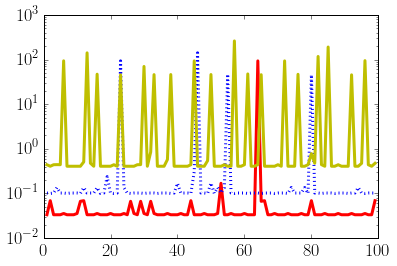

In [67]:
matplotlib.rcParams.update({'font.size': 18})

stys = ['r-','b:','y-','k:']
for obsidseti in range(len(spacings_hours)):
    plt.semilogy(1.*(obsidsets[obsidseti]-np.roll(obsidsets[obsidseti],1))/3600,stys[obsidseti],lw=3)

In [68]:
obsids2txt(obsidsets[0],'obsids_spaced_by_0hours.txt')
obsids2txt(obsidsets[1],'obsids_spaced_by_0_08hours.txt')
obsids2txt(obsidsets[2],'obsids_spaced_by_0_4hours.txt')

In [1]:
import imp
import mwa_utils
imp.reload(mwa_utils)
import commands
import numpy as np
import cPickle as pickle

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Arial')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [3]:
# run on eor-09
fhdcubesroot = '/nfs/mwa-03/r1/EoR2013/fhd_apb_EoR0_high_sem1_1/Healpix/'
analysis_root = '/nfs/mwa-09/r1/abrahamn/21cmIR/analysis/'

In [20]:
fhdlabels = ['obsids_spaced_by_0hours','obsids_spaced_by_0_08hours','obsids_spaced_by_0_4hours']
fhdhumanlabels = ['consecutive (spread over 4 days)','spaced by 5 min (spread over 14 days)','24 min (spread over 66 days)']

In [5]:
for i in range(len(fhdlabels)):
    print('loading '+(str(i)))
    freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,'Combined_obs_'+fhdlabels[i])
    mwa_image = mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=7, n=100)    
    pickle.dump( mwa_image, open( analysis_root+'Combined_obs_'+fhdlabels[i]+'.p', "wb" ) )

mwa_images = []
for i in range(len(fhdlabels[:16])):
    print('loading '+(str(i)))
    mwa_images.append(pickle.load( open( analysis_root+'Combined_obs_'+fhdlabels[i]+'.p', "rb" ) ))

loading 0
initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 1
initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 2
initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 0
loading 1
loading 2


In [6]:
fhddeeplabel = 'Combined_obs_wedge_cut_plus_res_cut'
mwa_deep_image = pickle.load( open( analysis_root+fhddeeplabel+'.p', "rb" ) )

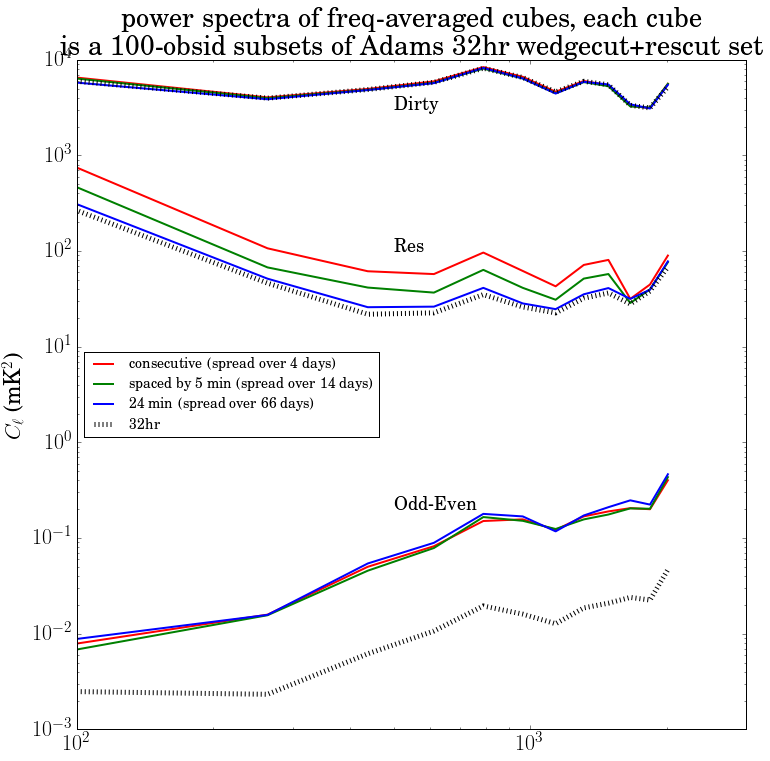

In [41]:
plt.figure(figsize=(12,12))

nbins = 12
lmax = 2100
cols = ['r','g','b']

# plot pointing integrations per day
for i in range(len(fhdlabels)):
    col = cols[i]
    lw = 2
    
    lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_images[i].dirty_xx_u0, mwa_images[i].weights_xx0, mwa_images[i].dtheta_rad,nbins,lmax,hann=False)
    lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].model_xx_u0, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    lbincenters, Cl_dirty_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].dirty_xx_u1, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    
    plt.loglog(lbincenters,Cl_dirty0*1.e6,col,linewidth=lw)
    plt.loglog(lbincenters,Cl_res0*1.e6,col,linewidth=lw,label=fhdhumanlabels[i])
    plt.loglog(lbincenters,Cl_dirty_diff*1.e6,col,linewidth=lw)
    
lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0, mwa_deep_image.weights_xx0, mwa_deep_image.dtheta_rad,nbins,lmax,hann=False)
lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.model_xx_u0, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, nbins,lmax, hann=False)
lbincenters, Cl_dirty_diff, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.dirty_xx_u1, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, nbins,lmax, hann=False)
plt.loglog(lbincenters,Cl_dirty0*1.e6,'k:',linewidth=5)
plt.loglog(lbincenters,Cl_res0*1.e6,'k:',linewidth=5,label='32hr')
plt.loglog(lbincenters,Cl_dirty_diff*1.e6,'k:',linewidth=5)

plt.text(500, 3000, 'Dirty', fontsize=18)
plt.text(500, 100, 'Res', fontsize=18)
plt.text(500, .2, 'Odd-Even', fontsize=18)

matplotlib.rcParams.update({'font.size': 22})
plt.ylabel(r'$C_\ell$ (mK$^2$)')
plt.ylim([1.e-3,1.e4])
#plt.ylim([10,1.e3])
plt.xlim([1.e2,3.e3])
plt.legend(fontsize=14,loc=6)
plt.title('power spectra of freq-averaged cubes, each cube \n is a 100-obsid subsets of Adam''s 32hr wedgecut+rescut set')